In [1]:
## UL-networkx-draft

import matplotlib.pyplot as plt
import networkx as nx
import csv

# Establish variables to be filled with public transport data
stops = {}
stopsOnTrip = {}
routes = {}

# Load metadata about each stop (hållplats) in Uppsala
with open('./gtfs_static_data_ul/stops.csv') as file:
    reader = csv.DictReader(file)
    # Create dictionary key for each row in stops.csv with values on name, latitude and longitude
    for row in reader:
        stops[row['stop_id']] = {'stop_name': row['stop_name'],
                                 'stop_lat': row['stop_lat'], 'stop_lon': row['stop_lon']}

# Load data on when all trips (avgångar) pass each stop (hållplats) in Uppsala
with open('./gtfs_static_data_ul/stop_times.csv') as file:
    reader1 = csv.DictReader(file)
    # Loops through stop_times.csv and creates dictionary with stops per unique trip
    for row in reader1:
        if row['trip_id'] not in stopsOnTrip:
            stopsOnTrip[row['trip_id']] = [stops[row['stop_id']]]
        if row['trip_id'] in stopsOnTrip:
            stopsOnTrip[row['trip_id']].append(stops[row['stop_id']])

# Load data on all trips (avgångar) in Uppsala
with open('./gtfs_static_data_ul/trips.csv') as file:
    reader2 = csv.DictReader(file)
    # Loops through trips.csv and creates dictionary with the first trip per unique route
    for row in reader2:
        if row['route_id'] not in routes:
            routes[row['route_id']] = stopsOnTrip[row['trip_id']]
     
G = nx.Graph()

G.add_nodes_from(stops)

nx.draw_spectral(G,with_labels=False,node_size=10)
plt.figure()

<Figure size 640x480 with 0 Axes>

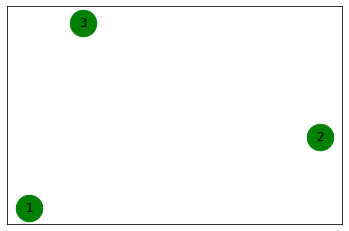

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib  inline

G = nx.Graph()

# nodes
G.add_node(1)
G.add_nodes_from([2, 3])

nx.draw_networkx(G,node_color='green',node_size=700)

In [11]:
# edges
G.add_edge(1,2)

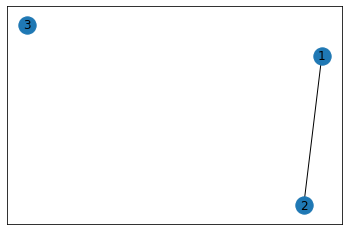

In [12]:
nx.draw_networkx(G)

In [13]:
# we can also add edges using unpack edge tuples

e = (2,3)
G.add_edge(*e)

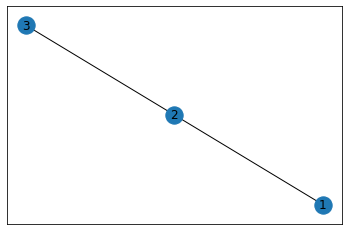

In [14]:
nx.draw_networkx(G)

In [15]:
# adding a list of edges

G.add_edges_from([(1,2),(1,3)])

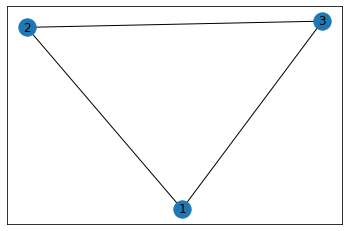

In [16]:
nx.draw_networkx(G)

In [ ]:
# find numbers of nodes in a graph
print(G.number_of_nodes())